In [1]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Generate Data

In [2]:
#generate some data
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

In [3]:
#each feature will have zero mean
X = X - np.mean(X, axis=0)

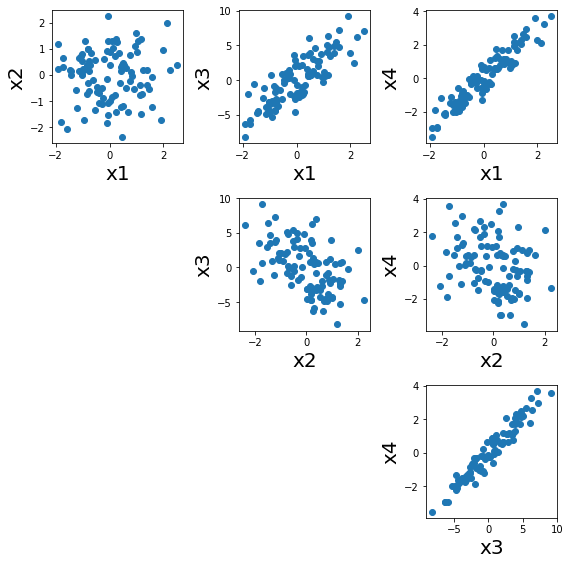

In [4]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(X[:,i], X[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

## Observations:
### - x1 and x2 do not seem correlated
### - x1 seems very correlated with both x3 and x4
### - x2 seems somewhat correlated with both x3 and x4
### - x3 and x4 seem very correlated

# Apply PCA

In [5]:
#initialize
pca = PCA(n_components=4)

#fit
pca.fit(X)

PCA(n_components=4)

In [6]:
#get principal components
principal_comps_builtin = pca.components_.T

In [7]:
#print each principal component
for i,component in enumerate(pca.components_):
    print(f'principal component {i}')
    print(component)
    print()

principal component 0
[ 0.21836467 -0.11571309  0.88882471  0.38589893]

principal component 1
[ 0.48454841  0.80382872 -0.14943543  0.31103261]

principal component 2
[ 0.18131723  0.29326099  0.36846687 -0.863339  ]

principal component 3
[ 0.82743808 -0.50444808 -0.22779784 -0.0947972 ]



# Can we do this by hand?

## Principal components are the eigenvectors of the covariance matrix

In [8]:
#compute covariance matrix
#https://www.youtube.com/watch?v=F-aku75OpoM
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100

In [9]:
#eigenvalues and eigenvectors of covariance matrix
eigvecs = np.linalg.eig(cov_matrix)

In [10]:
#sort order by magnitude of eigenvalue
ordering = np.argsort(eigvecs[0])[::-1]

In [11]:
#get eigenvectors
principal_comps_byhand = eigvecs[1][:,ordering]

In [12]:
#our by-hand eigenvectors
principal_comps_byhand

array([[ 0.21836467,  0.48454841, -0.18131723,  0.82743808],
       [-0.11571309,  0.80382872, -0.29326099, -0.50444808],
       [ 0.88882471, -0.14943543, -0.36846687, -0.22779784],
       [ 0.38589893,  0.31103261,  0.863339  , -0.0947972 ]])

In [13]:
#results from built-in call
principal_comps_builtin

array([[ 0.21836467,  0.48454841,  0.18131723,  0.82743808],
       [-0.11571309,  0.80382872,  0.29326099, -0.50444808],
       [ 0.88882471, -0.14943543,  0.36846687, -0.22779784],
       [ 0.38589893,  0.31103261, -0.863339  , -0.0947972 ]])

# ✔️